In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaspe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

x = ["Accepting", "Ambitious", "Authentic",
  "Brave", "Caring", "Challenging", "Cheerful",
  "Collaborative", "Communicator", "Creative", "Curious",
  "Decisive", "Dedicated", "Detailed", "Determined",
  "Enthusiastic", "Flexible", "Friendly", "Funny",
  "Hard-working", "Helpful", "Honest", "Integrity",
  "Kind", "Leader", "Logical", "Loyal",
  "Motivated", "Nurturing", "Open-minded", "Optimistic",
  "Persistent", "Practical", "Problem-solver", "Resilient",
  "Responsible", "Self-controlled", "Strong", "Supportive",
  "Team-player", "Trustworthy", "Versatile", "Well-organised"]



C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
tokenized_values = [word_tokenize(i) for i in x]
vectorized_words = Word2Vec(tokenized_values, min_count=1, size=3, window=5)
for i in x:
  print(vectorized_words[i], " = ", str(i))

TypeError: __init__() got an unexpected keyword argument 'size'

#Create a datapoint

In [ ]:
def create_datapoint(comp_values):

  datapoint = []
  for value in comp_values:
    datapoint.append(list(vectorized_words[value]))

  return np.mean(datapoint, axis = 0)

# Create a dataset


## Exercise 1: Create an empty pandas dataframe with 3 columns named X, Y, Z

In [ ]:
import pandas as pd

dataset = pd.DataFrame({'X' : [], 'Y':[], 'Z':[]})

In [ ]:
import random 

random.seed(5)

for i in range(100):
  # random choice can take 1 value multiple times, with random sample select 1 value
  # sample_data = [random.sample(x), random.choice(x), random.choice(x)]
  sample_data = random.sample(x, 3)
  preprocessed_data = create_datapoint(sample_data)
  
  dataset_length = len(dataset)
  dataset.loc[dataset_length] = preprocessed_data
  
print(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


           X         Y         Z
0  -0.019162  0.079662  0.004046
1  -0.039161 -0.032878  0.004333
2   0.020879 -0.100366 -0.042749
3  -0.022190 -0.020178 -0.018332
4  -0.049453 -0.055663 -0.016105
..       ...       ...       ...
95 -0.014831  0.016006  0.054322
96 -0.008512  0.008125  0.062899
97 -0.128629 -0.008952  0.051888
98  0.026927 -0.007687 -0.031871
99  0.025255  0.052494 -0.040302

[100 rows x 3 columns]


#Kmeans clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(dataset)

here we print the cluster labels for each datapoint

In [ ]:
kmeans.labels_

array([2, 0, 0, 0, 0, 3, 0, 4, 3, 1, 4, 0, 3, 3, 2, 0, 2, 4, 1, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 4, 0, 4, 4, 1, 4, 0, 0, 1, 0, 4, 1, 0, 1, 0, 4,
       1, 2, 1, 1, 1, 3, 2, 2, 1, 0, 4, 0, 1, 3, 1, 2, 0, 2, 1, 0, 0, 2,
       1, 0, 4, 0, 0, 1, 2, 4, 4, 0, 0, 4, 0, 4, 0, 3, 4, 2, 2, 0, 1, 4,
       0, 2, 3, 1, 3, 1, 2, 4, 4, 3, 1, 2], dtype=int32)

Here we print the centres of the clusters

In [ ]:
kmeans.cluster_centers_

array([[-0.02052666, -0.06595708,  0.02392972],
       [ 0.06492347, -0.00064844, -0.02657856],
       [-0.0342036 ,  0.05239211, -0.05075364],
       [-0.1250352 , -0.0201957 ,  0.07142147],
       [-0.05051371,  0.02671735,  0.02023248]], dtype=float32)

#Visualization

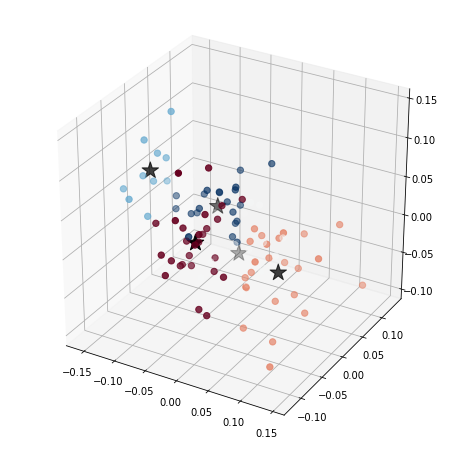

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(dataset['X'])
y1 = np.array(dataset['Y'])
z1 = np.array(dataset['Z'])

ax.scatter(x1,y1,z1, marker="o", c=kmeans.labels_, s=40, cmap="RdBu")
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker="*",s=300)
plt.show()

In [ ]:
print(kmeans.labels_)

[2 0 0 0 0 3 0 4 3 1 4 0 3 3 2 0 2 4 1 1 1 1 4 2 2 1 4 4 4 0 4 4 1 4 0 0 1
 0 4 1 0 1 0 4 1 2 1 1 1 3 2 2 1 0 4 0 1 3 1 2 0 2 1 0 0 2 1 0 4 0 0 1 2 4
 4 0 0 4 0 4 0 3 4 2 2 0 1 4 0 2 3 1 3 1 2 4 4 3 1 2]


#challenge 1: append kmeans.labels_ as a column to the dataset DataFrame

In [ ]:
dataset["labels"] = kmeans.labels_
print(dataset)


           X         Y         Z  labels
0  -0.019162  0.079662  0.004046       2
1  -0.039161 -0.032878  0.004333       0
2   0.020879 -0.100366 -0.042749       0
3  -0.022190 -0.020178 -0.018332       0
4  -0.049453 -0.055663 -0.016105       0
..       ...       ...       ...     ...
95 -0.014831  0.016006  0.054322       4
96 -0.008512  0.008125  0.062899       4
97 -0.128629 -0.008952  0.051888       3
98  0.026927 -0.007687 -0.031871       1
99  0.025255  0.052494 -0.040302       2

[100 rows x 4 columns]


##Challenge 2: Think of a way how we can give names to these clusters, also give it a try to implement this


#Bonus: simple hyperparameter tuning

In [ ]:
from multiprocessing.dummy import Pool
import functools

kmeans1 = KMeans()

# define your custom function for passing into each thread
def find_cluster(n_clusters, kmeans, X):
    from sklearn.metrics import silhouette_score  # you want to import in the scorer in your function

    kmeans.set_params(n_clusters=n_clusters)  # set n_cluster
    labels = kmeans1.fit_predict(X)  # fit & predict
    score = silhouette_score(X, labels)  # get the score

    return score

# Now's the parallel implementation
clusters = [3, 4, 5]
pool = Pool()
results = pool.map(functools.partial(find_cluster, kmeans=kmeans1, X=dataset), clusters)
pool.close()
pool.join()

# print the results
print(results)


[0.8307468076448162, 0.8307468076448162, 0.9222826650689839]


# Make a 3D plot and plot the cluster centroids as well as the vectorized values from X

In [ ]:
values_data = pd.DataFrame({'Value':[], 'X' : [], 'Y':[], 'Z':[]})

for value in x:

  vec = list(vectorized_words[value])
  vec.insert(0, value)


  dataset_length = len(values_data)
  values_data.loc[dataset_length] = vec

print(values_data)

              Value         X         Y         Z
0         Accepting -0.124152 -0.144163  0.082982
1         Ambitious -0.147332  0.112959 -0.018859
2         Authentic -0.055839 -0.045703  0.078656
3             Brave -0.057482 -0.107936 -0.117410
4            Caring  0.154892  0.111923 -0.098201
5       Challenging  0.122245 -0.061354 -0.018469
6          Cheerful -0.105906  0.049785  0.068010
7     Collaborative  0.153114  0.113757 -0.066854
8      Communicator  0.166154 -0.144682 -0.082217
9          Creative  0.140722  0.154221 -0.050274
10          Curious -0.162203 -0.066356  0.129267
11         Decisive -0.149404  0.094741 -0.098125
12        Dedicated -0.045634 -0.085368  0.164890
13         Detailed -0.066906  0.036527  0.097662
14       Determined  0.000583  0.054834 -0.075366
15     Enthusiastic -0.128801 -0.134915  0.029769
16         Flexible -0.058806  0.012765 -0.078885
17         Friendly -0.021634 -0.137950  0.050055
18            Funny -0.131972  0.055472  0.000730


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


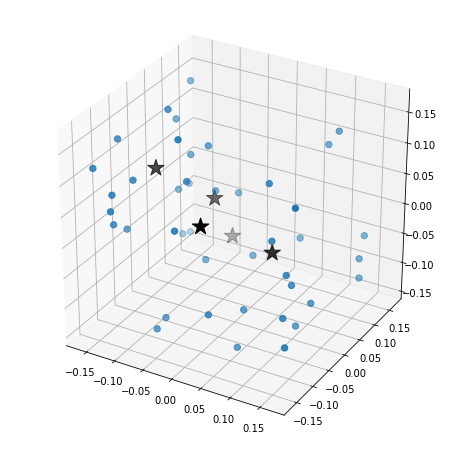

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x2 = np.array(values_data['X'])
y2= np.array(values_data['Y'])
z2 = np.array(values_data['Z'])

ax.scatter(x2,y2,z2, marker="o", s=40, cmap="RdBu")



ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker="*",s=300)
plt.show()

#Homework challenge: add names to each datapoint in the plot

In [ ]:
values_data.head(2)

,Value,X,Y,Z
0,Accepting,-0.124152,-0.144163,0.082982
1,Ambitious,-0.147332,0.112959,-0.018859


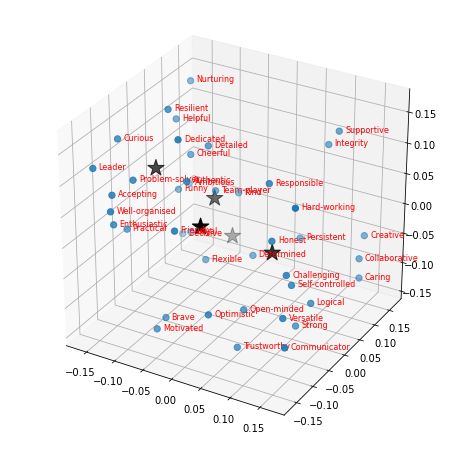

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x2 = np.array(values_data['X'])
y2= np.array(values_data['Y'])
z2 = np.array(values_data['Z'])

ax.scatter(x2,y2,z2, marker="o", s=40, cmap="RdBu")

### Added code 


for row in values_data.to_numpy():
  
  ax.text(row[1]+0.01, row[2], row[3], row[0], color="red", fontsize=8)
###

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='black', marker="*",s=300)
plt.show()

#Calculate the distance between each vectorized value from X and the cluster centroids

In [ ]:
from scipy.spatial import distance

word_cluster = {"0":[], "1":[], "2":[], "3":[], "4":[]}

#                 cluster centroids
#        [[-0.04977357, -0.02877725, -0.02636996],
#        [ 0.05722304,  0.00576233,  0.00946908],
#        [-0.01488634,  0.07766376,  0.01205709],
#        [ 0.02096947,  0.0497361 , -0.06257594],
#        [-0.01756257, -0.01770724,  0.05824161]]


for word in values_data.to_numpy():
  # word = [Ambitious -0.061846  0.111798  0.058224]
  distances = {} 
  for idx, cluster in enumerate(kmeans.cluster_centers_):
    # idx = 0, cluster = [-0.04977357, -0.02877725, -0.02636996]
    a = [word[1], word[2], word[3]]
    b = [cluster[0], cluster[1], cluster[2]]

    # calc euclidean distance
    dst = distance.euclidean(a, b)
    # 0.4
    distances[str(idx)] = dst
  
  # here we take the min of distances so that will be the cluster and we append the name to it in word_cluster
  word_cluster[str(min(distances, key=distances.get))].append(word[0])
  


for key, value in word_cluster.items():
  print(key, value)

0 ['Authentic', 'Brave', 'Friendly', 'Motivated', 'Optimistic', 'Well-organised']
1 ['Caring', 'Challenging', 'Collaborative', 'Communicator', 'Creative', 'Hard-working', 'Honest', 'Logical', 'Open-minded', 'Responsible', 'Self-controlled', 'Strong', 'Supportive', 'Trustworthy', 'Versatile']
2 ['Ambitious', 'Decisive', 'Determined', 'Flexible', 'Kind', 'Loyal', 'Persistent']
3 ['Accepting', 'Cheerful', 'Curious', 'Dedicated', 'Enthusiastic', 'Helpful', 'Leader', 'Nurturing', 'Practical', 'Problem-solver', 'Resilient']
4 ['Detailed', 'Funny', 'Integrity', 'Team-player']


In [ ]:
?distance